# 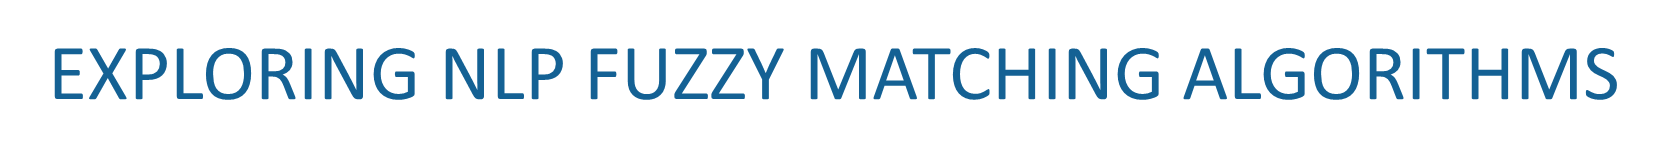

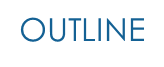

- [Introduction to fuzzy matching](#inro)
- [Applications of fuzzy matching](#applications)
- [Algorithms used for fuzzy matching](#algo)
    - [Levenshtein distance algorithm](#lev)
    - [Damerau-Levenshtein distance algorithm](#dlev)
    - [Bitmap algorithm](#bitap)
    - [n-gram algorithm](#ngram)
- [Implementation of fuzzy matching on real data](#real)
- [Other algorithms](#others)

<a id = 'intro'></a>

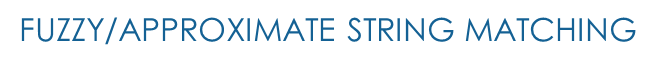

- Method to find strings which match a pattern approximately.
- Identifies the likelihood/probability that two records are true match based on some parameters.

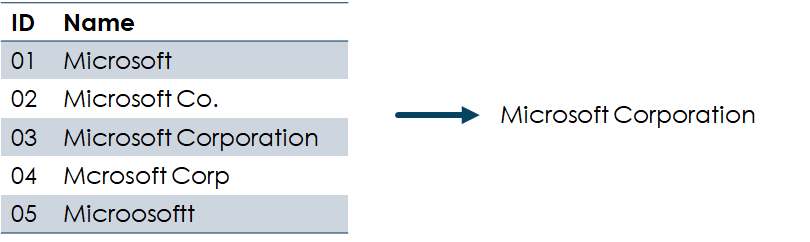

<a id = 'applications'></a>

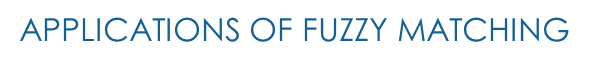

- Spell checker
- Deduplication of records
- Master data management
- Plagiarism detection
- Bioinformatics and DNA sequencing
- Spam filtering
- Content search

<a id = 'algo'></a>

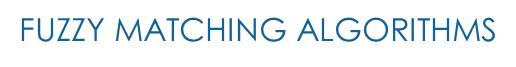

- Edit distance metric - quantifies how dissimilar two strings are by counting the minimum number of operations required to transform one string into the other
    - Levenshtein distance
    - Damerau–Levenshtein distance
- Bitap algorithm - tells whether a given text contains a substring which is "approximately equal" (defined in terms of Levenshtein distance) to a given pattern
- n-gram - predicts next item in a sequence of text (in form of a Markov model)

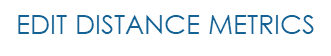

measures the number of edits needed to transform one word into another

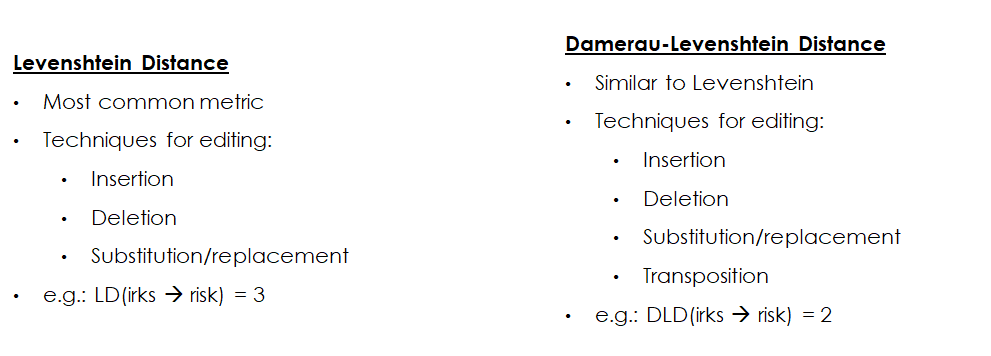

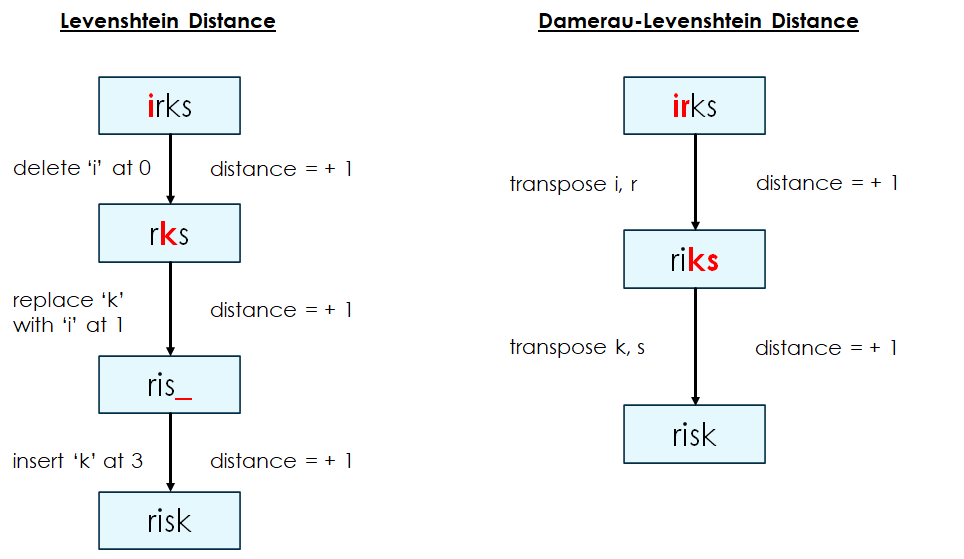

<a id = 'lev'></a>

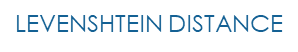

Levenshtein distance has the following properties:

- It is zero if and only if the strings are equal.
- It is at least the difference of the sizes of the two strings.
- It is at most the length of the longer string.
- Triangle inequality: The Levenshtein distance between two strings is no greater than the sum of their Levenshtein distances from a third string.


The Levenshtein distance between two strings a and b is given by leva,b(len(a), len(b)).

The Levenshtein distance between two strings 'a' and 'b', $lev_{a,b}(len(a), len(b))$,
where $lev_{a,b}(i, j)$ is equal to

$$
\begin{array}
& max(i, j) {\quad} if {\quad} min(i, j)=0 \\
{\text{otherwise:}} \\
\\
min \big(lev_{a,b}(i-1, j) + 1, \\
{\qquad} lev_{a,b}(i, j-1) + 1,  \\
{\qquad} lev_{a,b}(i-1, j-1) + 1_{a_i \neq b_j} \big) 
\end{array}    
$$    
where $1_{a_i \neq b_j}$ is the indicator function,
$$\begin{array}
& 1_{a_i \neq b_j} & = 0, {\text{when }} a_i = b_j \\
& = 1, {\text{otherwise}}
\end{array}$$

and $lev_{a,b}(i, j)$ is the distance between the first i characters of 'a' and the first j characters of 'b'.

In [1]:
def levdist(s, t):
    '''function to calculate the
    Levenshtein distance between
    two strings in a recursive way'''
    
    if s == '':
        return len(t)
    if t == '':
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
       
    dist = min([levdist(s[:-1], t)+1,
               levdist(s, t[:-1])+1, 
               levdist(s[:-1], t[:-1]) + cost])

    return dist

In [2]:
levdist('irks', 'risk')

3

In [3]:
import time

st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', levdist(s1, s2))
et = time.time()
print('time taken to calculate Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
time taken to calculate Levenshtein distance between  micrsft  and  microsoft corporation  is: 28.52 s


### This is slow! 

### Iterative computation using matrix improves the computation time

In [4]:
def iterative_levdist(s, t):
    '''function to calculate the
    Levenshtein distance between
    two strings in an iterative way'''

    rows = len(s)+1
    cols = len(t)+1
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for i in range(1, rows):
        dist[i][0] = i

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for i in range(1, cols):
        dist[0][i] = i
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = 1
            dist[row][col] = min(dist[row-1][col] + 1,      # deletion
                                 dist[row][col-1] + 1,      # insertion
                                 dist[row-1][col-1] + cost) # substitution

 
    return dist[row][col]

In [5]:
iterative_levdist('irks', 'risk')

3

In [6]:
st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', iterative_levdist(s1, s2))
et = time.time()
print('time taken to calculate Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
time taken to calculate Levenshtein distance between  micrsft  and  microsoft corporation  is: 0.0 s


<a id = 'dlev'></a>

### Damerau-Levenshtein Distance works similar to Levenshtein distance

#### To install jellyfish package, pip install jellyfish
Refer [here](https://pypi.org/project/jellyfish/) for more information on this package

In [7]:
import jellyfish

print('Levenshtein distance is: ', jellyfish.levenshtein_distance('irks', 'risk'))
print('Damerau-Levenshtein distance is: ', jellyfish.damerau_levenshtein_distance('irks', 'risk'))

Levenshtein distance is:  3
Damerau-Levenshtein distance is:  2


In [8]:
st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Damerau-Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', jellyfish.damerau_levenshtein_distance(s1, s2))
et = time.time()
print('time taken to calculate Damerau-Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Damerau-Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
time taken to calculate Damerau-Levenshtein distance between  micrsft  and  microsoft corporation  is: 0.0 s


<a id = 'bitap'></a>

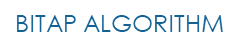

- also known as the shift-or, shift-and or Baeza-Yates–Gonnet algorithm
- states whether a given text contains a substring which is "approximately equal" (defined by Levenshtein distance) to a given pattern.


**Input:**

Text: womenwhocode

Pattern: code

**Output:** 
Pattern found at index: 8

**Input:**

Text: youareawesome 

Pattern: youareamazing

**Output:** No Match

In [9]:
import sys

def bitap_search(text, pattern):
    
    '''function to do a bit-ap search
    using bit array
    (this is python implementation of the
    code in GeekforGeeks)'''
    
    len_pattern = len(pattern)
    
    #initializing the bit array to complement of 0
    bit_array = [~0] * (sys.maxunicode)
    
    # R is a variable, initiliazing it to complement of 1
    R = ~1
    
    # taking care of the edge cases
    # when the pattern is absent
    # or when the pattern is longer than the text
    if len_pattern == 0:
        return -1

    if len_pattern > len(text):
        print('Pattern too long!')
        return -1

    
    for i in range(len_pattern):
        bit_array[ord(pattern[i])] &= ~(1 << i)

    for i in range(len(text)):
        R |= bit_array[ord(text[i])]
        R <<= 1;
        if (R & (1 << len_pattern)) == 0:
            return i - len_pattern + 1

    return -1



def findPattern(t, p):
    text = list(t);
    pattern = list(p);
    index = bitap_search(text, pattern);
    if index == -1:
        print('No Match')
    else:
        print('Pattern found at index:', index)

In [10]:
text = 'womenwhocode'
pattern = 'code'

findPattern(text, pattern)

Pattern found at index: 8


In [11]:
text = 'youareamazing'
pattern = 'youareawesome'

findPattern(text, pattern)

No Match


<a id = 'ngram'></a>

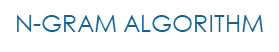

- n-gram: set of values generated from a string by pairing sequentially occurring ‘n’ characters/words
- goal: compute probability of a sequence of characters/words or sentence 
- predicts next item in a sequence of text (in form of a Markov model)

### PROBABILITY 

Conditional probability with 2 variables/words:

$$ \large{p(w_1 \cap w_2) = p(w_1) p(w_2|w_1)}$$

Conditional probability with 4 variables/words:

$$\large{p(w_1 \cap w_2 \cap w_3 \cap w_4) = p(w_1) p(w_2|w_1) p(w_3|w_1 \cap w_2) p(w_4|w_1 \cap w_2 \cap w_3) }$$

Therefore, joint probability can be calculated using chain rule:

$$\Large{ p(w_1 \cap w_2 , \cdots, w_n) = \prod_{i} p (w_i|w_1 w_2 \cdots w_{n-1}) }$$

### &nbsp;&nbsp;&nbsp; TOO MANY POSSIBLE COMBINATIONS!!


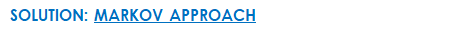

### Approximate each component of the product by maximum likelihood estimate

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['company name is microsoft', 'company the name is Microsoft', 
          'company name mcrosft', 'the company is Microsft Co',
         'company is Microsoft Corporation', 'the company is name microsoft Corp', 
          'company MCSFT CO name']

clean_corpus = ['The company name is Microsoft Corporation']

In [13]:
vect1 = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
x = vect1.fit_transform(corpus)

print(vect1.get_feature_names())

['co', 'company', 'corp', 'corporation', 'is', 'mcrosft', 'mcsft', 'microsft', 'microsoft', 'name', 'the']


In [14]:
vect2 = TfidfVectorizer(analyzer='word', ngram_range=(3, 3))
x = vect2.fit_transform(corpus)

print(vect2.get_feature_names())

['company is microsft', 'company is microsoft', 'company is name', 'company mcsft co', 'company name is', 'company name mcrosft', 'company the name', 'is microsft co', 'is microsoft corporation', 'is name microsoft', 'mcsft co name', 'name is microsoft', 'name microsoft corp', 'the company is', 'the name is']


In [15]:
vect3 = TfidfVectorizer(analyzer='word', ngram_range=(2, 5))
x = vect3.fit_transform(corpus)

print(vect3.get_feature_names())

['co name', 'company is', 'company is microsft', 'company is microsft co', 'company is microsoft', 'company is microsoft corporation', 'company is name', 'company is name microsoft', 'company is name microsoft corp', 'company mcsft', 'company mcsft co', 'company mcsft co name', 'company name', 'company name is', 'company name is microsoft', 'company name mcrosft', 'company the', 'company the name', 'company the name is', 'company the name is microsoft', 'is microsft', 'is microsft co', 'is microsoft', 'is microsoft corporation', 'is name', 'is name microsoft', 'is name microsoft corp', 'mcsft co', 'mcsft co name', 'microsft co', 'microsoft corp', 'microsoft corporation', 'name is', 'name is microsoft', 'name mcrosft', 'name microsoft', 'name microsoft corp', 'the company', 'the company is', 'the company is microsft', 'the company is microsft co', 'the company is name', 'the company is name microsoft', 'the name', 'the name is', 'the name is microsoft']


### Let's implement on this example and compare with Levenshtein distance

In [16]:
import pandas as pd
import itertools

# for fuzzy matching
from fuzzy_match import algorithims

In [17]:
# make a cartesian combination of the words in the corpus and the correct word

cart_list = list(itertools.product(corpus, clean_corpus))
cart_list

[('company name is microsoft', 'The company name is Microsoft Corporation'),
 ('company the name is Microsoft',
  'The company name is Microsoft Corporation'),
 ('company name mcrosft', 'The company name is Microsoft Corporation'),
 ('the company is Microsft Co', 'The company name is Microsoft Corporation'),
 ('company is Microsoft Corporation',
  'The company name is Microsoft Corporation'),
 ('the company is name microsoft Corp',
  'The company name is Microsoft Corporation'),
 ('company MCSFT CO name', 'The company name is Microsoft Corporation')]

In [18]:
def get_matches(lst):
    
    '''function to calculate the Levenshtein
    distance, trigram match score and the cosine
    similarity matches for the above example'''
    
    x, y, lscore, tscore, cscore = [], [], [], [], []

    for i in range(len(lst)):
        x.append(lst[i][0])
        y.append(lst[i][1])
        
        lscore.append(round(algorithims.levenshtein(lst[i][0], lst[i][1]), 3))
        tscore.append(round(algorithims.trigram(lst[i][0], lst[i][1]), 3))
        cscore.append(round(algorithims.cosine(lst[i][0], lst[i][1]), 3))
    
    df = pd.DataFrame(list(zip(x, y, lscore, tscore, cscore)),
                    columns = ['in_data', 'clean_data', 'lev_score', 'tri_score', 'cosine_score'])
    
    return df

In [19]:
get_matches(cart_list)

,in_data,clean_data,lev_score,tri_score,cosine_score
0,company name is microsoft,The company name is Microsoft Corporation,0.585,0.650,0.612
1,company the name is Microsoft,The company name is Microsoft Corporation,0.512,0.750,0.730
2,company name mcrosft,The company name is Microsoft Corporation,0.463,0.386,0.471
3,the company is Microsft Co,The company name is Microsoft Corporation,0.610,0.512,0.365
4,company is Microsoft Corporation,The company name is Microsoft Corporation,0.780,0.775,0.816
5,the company is name microsoft Corp,The company name is Microsoft Corporation,0.634,0.780,0.500
6,company MCSFT CO name,The company name is Microsoft Corporation,0.293,0.333,0.408


<a id = 'real'></a>

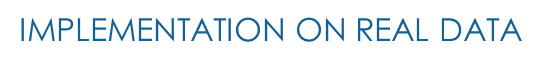

### Download data [here from Kaggle](https://www.kaggle.com/leandrodoze/room-type).

The data contains two columns for room type descriptions. Column 1 is the description from Expedia, and column 2 is the associated room type in Booking.com.

<u> **Aim:**</u> is to compare and match these two columns and the result would be 'human like understanding that the matched entries are same'.

Packages used: 
- fuzzywuzzy (Refer [here](https://pypi.org/project/fuzzywuzzy/) for more information).
- fuzzy_match (Refer [here](https://pypi.org/project/fuzzy-match/) for more information).

In [23]:
# import libraries
import pandas as pd

# this is for fuzzy matching
from fuzzywuzzy import fuzz
from fuzzy_match import algorithims

In [24]:
data_df = pd.read_csv('room_type.csv')

In [25]:
data_df.head()

,Expedia,Booking.com
0,"Deluxe Room, 1 King Bed",Deluxe King Room
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room


#### RATIO - Compares the entire string similarity

In [26]:
def get_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframe and
    return the ratio for the entire string similarity'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.ratio(col1, col2)

#### PARTIAL RATIO - Compares partial string similarity

In [27]:
def get_partial_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for partial string similarity'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.partial_ratio(col1, col2)

#### TOKEN SORT RATIO - Ignores word order

In [28]:
def get_token_sort_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring word order'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.token_sort_ratio(col1, col2)

#### TOKEN SET RATIO - Ignore duplicate words similarly to token sort ratio

In [29]:
def get_token_set_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring duplicate words and word order'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.token_set_ratio(col1, col2)

#### TRIGRAM - Calculates a similarity score and find matches by splitting strings into ngrams with a length of 3. The length of the ngram can be altered if desired.

In [30]:
def get_trigram_value(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring duplicate words and word order'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return round(algorithims.trigram(col1, col2), 3)

In [31]:
data_df['full_ratio'] = data_df.apply(get_ratio, axis=1)
data_df['partial_ratio'] = data_df.apply(get_partial_ratio, axis=1)
data_df['token_sort_ratio'] = data_df.apply(get_token_sort_ratio, axis=1)
data_df['token_set_ratio'] = data_df.apply(get_token_set_ratio, axis=1)
data_df['trigram'] = data_df.apply(get_trigram_value, axis=1)
data_df.head()

,Expedia,Booking.com,full_ratio,partial_ratio,token_sort_ratio,token_set_ratio,trigram
0,"Deluxe Room, 1 King Bed",Deluxe King Room,62,69,84,100,0.739
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible,68,65,78,81,0.562
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room,79,100,80,100,0.793
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite,51,65,85,100,0.750
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room,76,82,90,100,0.829


####  It looks like TOKEN SET RATIO from fuzzywuzzy package is the best method to get the most similar matches in this example.

<a id = 'others'></a>

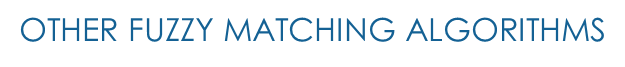

- Edit distance 
    - Longest common subsequence 
    - Hamming distance
    - Jaro distance
- Needleman–Wunsch algorithm
- Smith–Waterman algorithm
- BK Tree metric
- Soundex or Metaphone – phonetic algorithms 

[Record Linkange Toolkit](https://recordlinkage.readthedocs.io/en/latest/about.html) library to link records in or between data sources and provides tools for deduplication and record linkage.

# REFERENCES
1. [Levenshtein, Vladimir I. "Binary codes capable of correcting deletions, insertions, and reversals." In Soviet physics doklady, vol. 10, no. 8, pp. 707-710. 1966.](https://nymity.ch/sybilhunting/pdf/Levenshtein1966a.pdf)
2. [Damerau, Fred J. "A technique for computer detection and correction of spelling errors." Communications of the ACM 7, no. 3 (1964): 171-176.](https://dl.acm.org/doi/abs/10.1145/363958.363994)
3. [Cayrol, M., Farreny, H. and Prade, H. (1982), 'Fuzzy Pattern Matching', Kybernetes, Vol. 11 No. 2, pp. 103-116.](https://doi.org/10.1108/eb005612)
4. [Ukkonen, Esko. "Algorithms for approximate string matching." Information and control 64, no. 1-3 (1985): 100-118.](https://reader.elsevier.com/reader/sd/pii/S0019995885800462?token=6B1FB04FFCA70F0F9A2AAB96C6311FAA5E93FFB7F1C1B4A75A61D72728A2B6A655B4944421AD983395F0B11AAB73F520&originRegion=us-east-1&originCreation=20210331153641)
5. [Geek for Geeks - applications of fuzzy string matching](https://www.geeksforgeeks.org/applications-of-string-matching-algorithms/)
6. [Geek for Geeks - Bitap Algorithm](https://www.geeksforgeeks.org/java-program-to-implement-bitap-algorithm-for-string-matching/)
7. [Stanford slides on n-gram](https://web.stanford.edu/~jurafsky/slp3/slides/LM_4.pdf)
8. [Data camp tutorial - fuzzy string matching](https://www.datacamp.com/community/tutorials/fuzzy-string-python)
9. [Levenshtein distance theory](https://www.python-course.eu/levenshtein_distance.php)
10. [Article on record linking and fuzzy matching](https://pbpython.com/record-linking.html)
11. [Medium post on Levenshtein distance](https://blog.paperspace.com/measuring-text-similarity-using-levenshtein-distance/)
12. [stackoverflow for n-gram similarity](https://stackoverflow.com/questions/53827339/string-matching-using-tf-idf-ngrams-and-cosine-similarity-in-python)